### Imports

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import math
from scipy import special
import bisect
from statistics import mean
from cycler import cycler
import pickle
from matplotlib.pyplot import figure
from cgi import test
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.integrate import solve_ivp
import csv
import warnings
import numpy.polynomial.polynomial as poly
import seaborn as sns

### Parameters

In [4]:
l0_folded = 1
lb = 1
kappab = 0.25
k_BT = 4.114 
l_b = 1 
e_b = 1.5  
kappa = .25 
sigma_b = math.sqrt(k_BT / 0.25) 
Delta = 10 
Delta1 = 5
Delta2 = 5
e_f = 0.5 
k_beta = 1
k_delta = 1
F0 = k_BT/ math.sqrt(k_BT )

#### Colors

In [17]:
labels_mean = [r'$\langle n_a \rangle $', r'$\langle n_{b} \rangle$', r'$\langle n_{a_u} \rangle$', r'$\langle n_{b_u} \rangle$' ]
labels = [r'$n_a$', r'$n_b$', '$n_{a_u}$', '$n_{b_u}$']

colors_occupationnumbers = [ 'teal', 'g', 'c', 'lightgreen']
colors_blue = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'blue','mediumblue','darkblue',  'midnightblue','darkslateblue','indigo','k']
colors_orange = ['khaki', 'yellow', 'gold', 'orange', 'darkorange', 'coral', 'orangered', 'firebrick', 'brown', 'darkred', 'saddlebrown']
colors_new = ['y', 'yellowgreen','g', 'c', 'paleturquoise',  'lightblue']  
colors_green = ['greenyellow', 'palegreen', 'limegreen', 'green',  'darkgreen', 'darkslategrey', 'k']
colorfinal = ['gold', 'lightgreen', 'mediumseagreen', 'lightskyblue', 'dodgerblue', 'midnightblue' ]

### Load Simulation Data

In [6]:
with open('SimulationValues.pkl', 'rb') as f:
    dictsimualtion= pickle.load(f)

### Load Mathematica Data

In [9]:
with open('MathematicaValues.pkl', 'rb') as f:
    dictmathematica = pickle.load(f)
with open('mean_xi0-012_final.pkl', 'rb') as f: # this is a new generated dictionary that contains more numerical values and yield better results.
    dictsimualtion_new = pickle.load(f)

### Plot $\kappa \langle h \rangle$ = F/$\langle N_B \rangle$ as a function of F

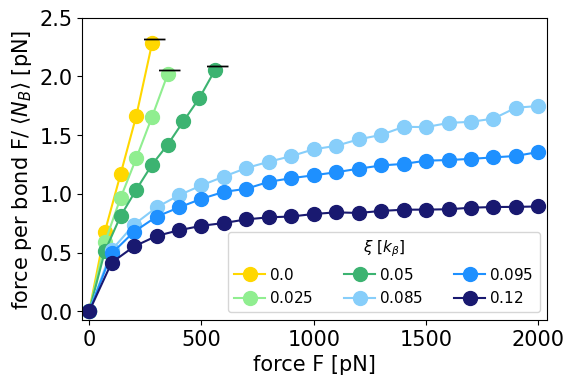

In [13]:
marker = 10

fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 100)


ax1.plot(dictsimualtion_new.get(f'f0')[:-1],  
         dictsimualtion_new.get(f'FNB0'), '-o',
         color = 'gold', 
         label = r'$ 0.0$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f025')[:-1],  
         dictsimualtion_new.get(f'FNB025'), '-o',
         color = 'lightgreen', 
         label = r'$ 0.025$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f05')[:-2],  
         dictsimualtion_new.get(f'FNB05'), '-o',
         color = 'mediumseagreen', 
         label = r'$ 0.05$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f085'),  
         dictsimualtion_new.get(f'FNB085'), '-o',
         color = 'lightskyblue', 
         label = r'$ 0.085$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f095'),  
         dictsimualtion_new.get(f'FNB095'), '-o',
         color = 'dodgerblue', 
         label = r'$ 0.095$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f12'),  
         dictsimualtion_new.get(f'FNB12'), '-o',
         color = 'midnightblue', 
         label = r'$ 0.12$', markersize = marker)


#legend
legend = ax1.legend(loc = 'lower right', ncol = 3, title = r'$\xi\,\,[k_{\beta}]$', fontsize = 11, handletextpad = 0.3)
legend.get_title().set_fontsize('11')
ax1.set_xlabel('force F [pN]', fontsize = 15)
ax1.set_ylabel(r'force per bond F/ $\langle N_B \rangle$ [pN] ', fontsize = 15)

#ticks 
ax1.set_xticks([0, 500, 1000, 1500, 2000, 2500])
ax1.set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
ax1.tick_params(labelsize=15)

# Limits
ax1.set_xlim(-30, 2040)
ax1.set_ylim(-0.07, 2.5)

ax1.text(233, 2.36, '|', fontsize = 15, rotation = 90)
ax1.text(303, 2.10, '|', fontsize = 15, rotation = 90)
ax1.text(513, 2.13, '|', fontsize = 15, rotation = 90)


plt.show()

### Plot $N_B$ as a function of F 

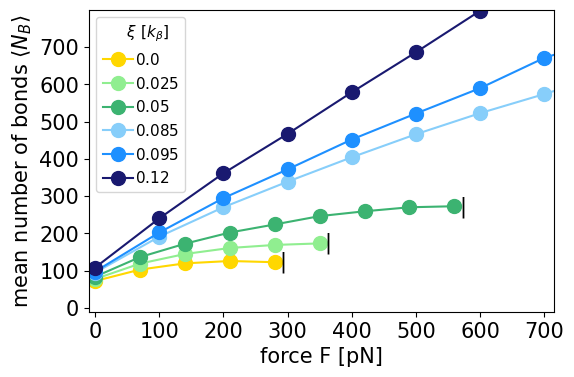

In [14]:
fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 100)

ax1.plot(dictsimualtion_new.get(f'f0')[:-1],  
         dictsimualtion_new.get(f'NB0')[:-1], '-o',
         color = 'gold', 
         label = r'$ 0.0$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f025')[:-1],  
         dictsimualtion_new.get(f'NB025')[:-1], '-o',
         color = 'lightgreen', 
         label = r'$ 0.025$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f05')[:-2],  
         dictsimualtion_new.get(f'NB05')[:-2], '-o',
         color = 'mediumseagreen', 
         label = r'$ 0.05$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f085'),  
         dictsimualtion_new.get(f'NB085'), '-o',
         color = 'lightskyblue', 
         label = r'$ 0.085$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f095'),  
         dictsimualtion_new.get(f'NB095'), '-o',
         color = 'dodgerblue', 
         label = r'$ 0.095$', markersize = marker)

ax1.plot(dictsimualtion_new.get(f'f12'),  
         dictsimualtion_new.get(f'NB12'), '-o',
         color = 'midnightblue', 
         label = r'$ 0.12$', markersize = marker)


legend = ax1.legend(loc = 'upper left', ncol = 1, title = r'$\quad \xi\,\,[k_{\beta}]$', fontsize = 11, handletextpad = 0.1)
legend.get_title().set_fontsize('11')

ax1.set_xlabel('force F [pN]', fontsize = 15)
ax1.set_ylabel(r'mean number of bonds $\langle N_B \rangle$', fontsize = 15)

ax1.text(288, 109, r'| ', color = 'k', fontsize = 15)
ax1.text(357, 159, r'|', color = 'k', fontsize = 15)
ax1.text(568, 258, r'|', color = 'k', fontsize = 15)

ax1.set_xlim(-10,715)
ax1.set_ylim(-10,800)

#ticks
ax1.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
ax1.set_yticks([0, 100, 200, 300, 400, 500, 600, 700])
ax1.tick_params(labelsize=15)

#plt.savefig("Plots/Thesis/NB-f_gp10_gm1_xi025-12.svg", format = 'svg', dpi = 150, bbox_inches = 'tight')
plt.show()

## Mean-Field results

### Plot $\langle N_B \rangle$ vs. v; compare to simulation results

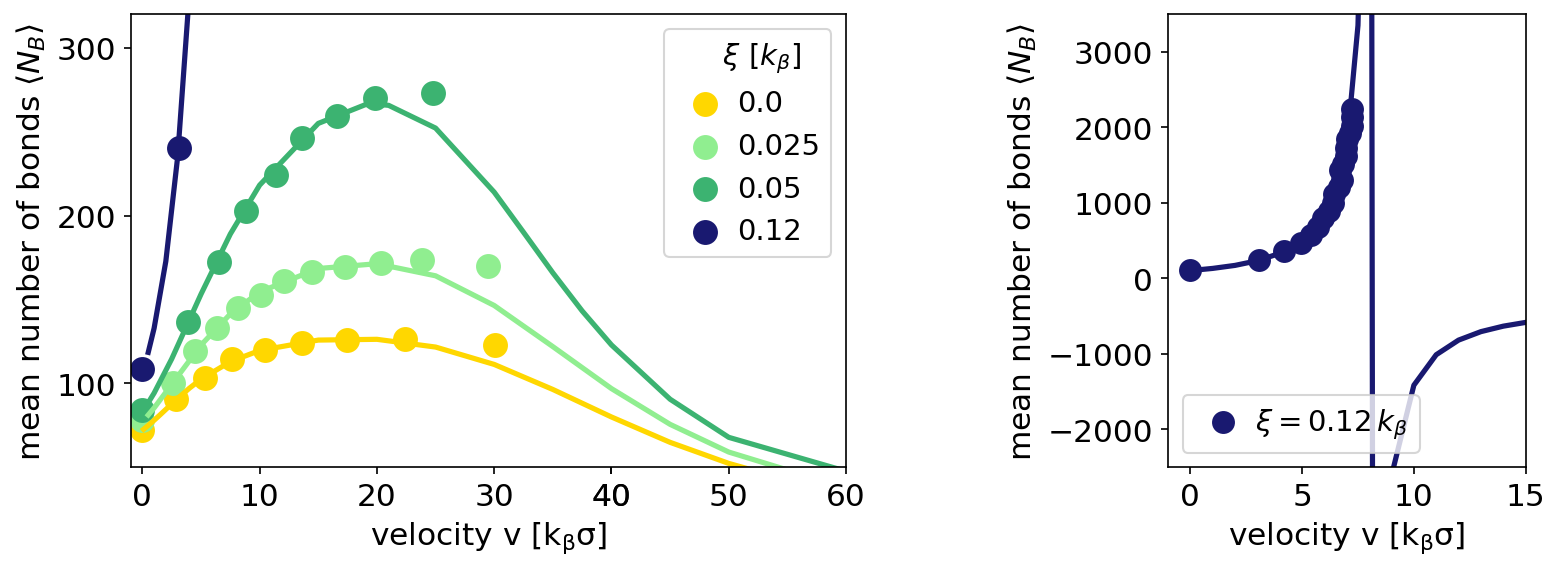

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4), gridspec_kw={'width_ratios': [2, 1]}, dpi = 150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.6, hspace=.4)

"""first plot"""

xiplot = [0, '025', '05']

for i in xiplot:
    axs[0].scatter(dictsimualtion_new.get(f'v{i}_s')[:-2], 
                dictsimualtion_new.get(f'NB{i}_s')[:-2], 
                color = colorfinal[xiplot.index(i)], 
                s = 120, label = f'0.{i}')
    axs[0].plot(dictmathematica.get(f'v{i}'),
             dictmathematica.get(f'NB{i}'), lw = 2.5, 
             color = colorfinal[xiplot.index(i)])

axs[0].scatter(dictsimualtion_new.get(f'v12'), 
            dictsimualtion_new.get(f'NB12'), 
            color = colorfinal[-1], 
            s = 120, label = f'0.12')
axs[0].plot(dictmathematica.get(f'v12')[0:10], 
         dictmathematica.get(f'NB12')[0:10], lw = 2.5,
         color = colorfinal[-1])

axs[0].set_xticks([0, 10, 20, 30, 40, 40, 50, 60])
axs[0].set_yticks([100, 200, 300])
axs[0].tick_params(labelsize=15)

axs[0].set_xlim(-1, 60)
axs[0].set_ylim(50, 320)
legend = axs[0].legend(loc = 'upper right', title = r'$\quad \xi\,\,[k_{\beta}]$', fontsize = 14, handletextpad = 0.1)
legend.get_title().set_fontsize('14')
axs[0].set_xlabel(r'velocity v $\mathrm{[k_{\beta}\sigma]}$', fontsize = 15)
axs[0].set_ylabel(r'mean number of bonds $\langle N_{B} \rangle$', fontsize = 15)

"""second plot"""
axs[1].scatter(dictsimualtion_new.get(f'v12'), 
            dictsimualtion_new.get(f'NB12'), 
            color = colorfinal[-1], 
            s = 100, label = r'$\xi = $' + f'0.12'+r'$\,k_{\beta}$')

axs[1].plot(dictmathematica.get(f'v12')[0:24], 
         dictmathematica.get(f'NB12')[0:24], lw = 2.5,
         color = colorfinal[-1])

axs[1].set_xlim(-1, 15)
axs[1].set_ylim(-2500, 3500)

axs[1].set_xlabel(r'velocity v $\mathrm{[k_{\beta}\sigma]}$', fontsize = 15)
axs[1].set_ylabel(r'mean number of bonds $\langle N_{B} \rangle$', fontsize = 15)

axs[1].set_xticks([0, 5, 10, 15])
axs[1].set_yticks([-2000, -1000, 0, 1000, 2000, 3000])
axs[1].tick_params(labelsize=15)
legend = axs[1].legend(loc = 'lower left', fontsize = 14, handletextpad = 0.1)

plt.show()

### Plot NB vs. v from numercial solutions

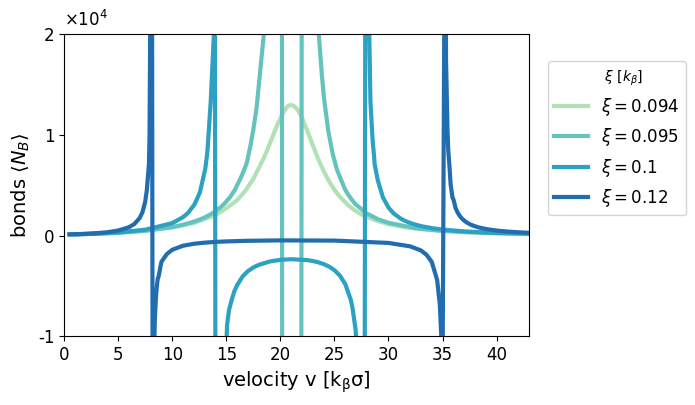

In [116]:
fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 100)

xiplot = ['094', '095', '1', '12']

palette = sns.color_palette("YlGnBu", 6)

for i in xiplot:
    ax1.plot(dictmathematica.get(f'NEWv{i}'), 
             dictmathematica.get(f'NEWNB{i}'), 
             color = palette[xiplot.index(i)+1], 
             label = r'$\xi=$'+f'0.{i}', lw = 3)

ax1.set_xlim(0, 43)
ax1.set_ylim(-10000, 20000)
ax1.set_xlabel(r'velocity v $\mathrm{[k_{\beta}\sigma]}$', fontsize = 14)
ax1.set_ylabel(r'bonds $\langle N_{B} \rangle$', fontsize = 14)

ax1.set_title(r'$\times 10^4$', loc = 'left', fontsize = 12)
ax1.set_yticks([-10000, 0, 10000, 20000])
ax1.set_yticklabels([-1, 0, 1, 2])
ax1.tick_params(labelsize=12)
ax1.legend(loc = (1.04, 0.4), title=r'$\quad \xi \,\, [k_{\beta}]$', fontsize = 12)

plt.show()

### Fit function NB: f(v) = a/((v-j)^2-p)
use 'fitfunc' first to determine parameter a and j. Subsequently they are set to a constant value in 'fitnew', which then gives fitparameter b for different values of xi.

In [49]:
xnew = np.linspace(-1, 100, 10_000_000)
def fitlin(x,a,b): # fitfunction for fitparameter p; should be linear in xi
    return a*(x-b)

def fitnew(x, b):
    a = 8e4 
    j = 21
    return a/((x-j)**2 + b)

def fitfunc(x, a, j, b):
    return a/((x-j)**2 + b)

In [50]:
"""xi = 0"""
xi = 0 
p = [1]
newpopt_0, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'),  p0= p)
print('b =', newpopt_0[0])

b = 604.2484321608019


In [51]:
"""xi = 0.025"""
xi = '025'
p = [1]
newpopt_025, pcov = curve_fit(fitnew,  dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'),  p0=p)#bounds=(b0,b1))
print('b =', newpopt_025[0])

b = 450.6618797506396


In [52]:
"""xi = 0.05"""
xi = '05'
p = [1]
newpopt_05, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'), p0=p)# bounds=(b0,b1))
print('b =', newpopt_05[0])

b = 292.82945648932997


In [53]:
"""xi = 0.09"""
xi = '09'
p = [1]
newpopt_09, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'), p0=p)
print('b =', newpopt_09[0])

b = 31.565239128569115


In [54]:
"""xi = 0.094"""
xi = '094'
p = [1]
newpopt_094, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'), p0=p)
print('b =', newpopt_094[0])

b = 5.53194206620394


In [55]:
"""xi = 0.098"""
xi = '098'
p = [-28]
newpopt_098, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'), p0=p)#bounds = (b0, b1))
print('b =', newpopt_098[0])

b = -29.689830245367087


In [56]:
"""xi = 0.1"""
xi = '1'
p = [-43]
newpopt_1, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'), p0=p)#bounds = (b0, b1))
print('b =', newpopt_1[0])

b = -44.816058706544005


In [57]:
"""xi = 0.12"""
xi = 12
p = [ -165]
newpopt_12, pcov = curve_fit(fitnew, dictmathematica.get(f'v{xi}'), dictmathematica.get(f'NB{xi}'), p0=p)#bounds = (b0, b1))
print('b =', newpopt_12[0])

b = -166.14721338981877


Plot the resulting values of p against xi. According to mathematica, it should be linear in $\xi$.

In [69]:
# linear fit for parameter b
popt_p, pcov_p = curve_fit(fitlin, xi, pval, p0=[-10, 0.09])
print(popt_p)

[-6.46700180e+03  9.43061865e-02]


In [67]:
xi = [0, 0.025, 0.05, 0.09, 0.094, 0.095, 0.098, 0.1, 0.12]
# given a = 8e+04 and j = 21, bval includes all previously computed values for b
bval =    [604.24843216, 450.66187975, 292.83005813, 31.56523913, 5.53194207, -1.10515237, -29.68983025, -44.81606283, -166.14721339]

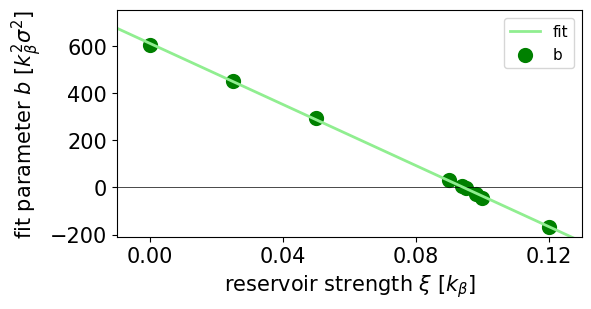

In [68]:
fig = plt.figure(figsize = (6,3), dpi = 100)

plt.axhline(0, color = 'k', lw = 0.5)
plt.scatter(xi, bval, color = 'g', lw = 2, s=80, label = 'b')
plt.plot(xnew, fitlin(xnew, *popt_p), color = 'lightgreen', lw = 2, label = 'fit')

plt.yticks([-200, 0, 200, 400, 600], fontsize = 15)
plt.xticks([0, 0.04, 0.08, 0.12], fontsize = 15)

plt.legend(loc = 'upper right', fontsize = 11)
plt.xlabel(r'reservoir strength $\xi\,\, [k_{\beta}]$', fontsize = 15)
plt.ylabel(r'fit parameter $b\,\,[k_{\beta}^2\sigma^2]$', fontsize = 15)
plt.xlim(-0.01, 0.13)
plt.ylim(-210, 750)

plt.show()

## Plot $\langle h \rangle$ vs. v Simulation

In [74]:
# fit for stretch
def fitsquare(x, a, j, b):
    return a*(x-j)**2 + b

v = dictsimualtion.get(f'v0')[0:-3]
h_bu = dictsimualtion.get(f'h0')[0:-3]
                   
popt_stretch_bu, pcov_stretch = curve_fit(fitsquare, v, h_bu, p0=[-10, 20, 20])

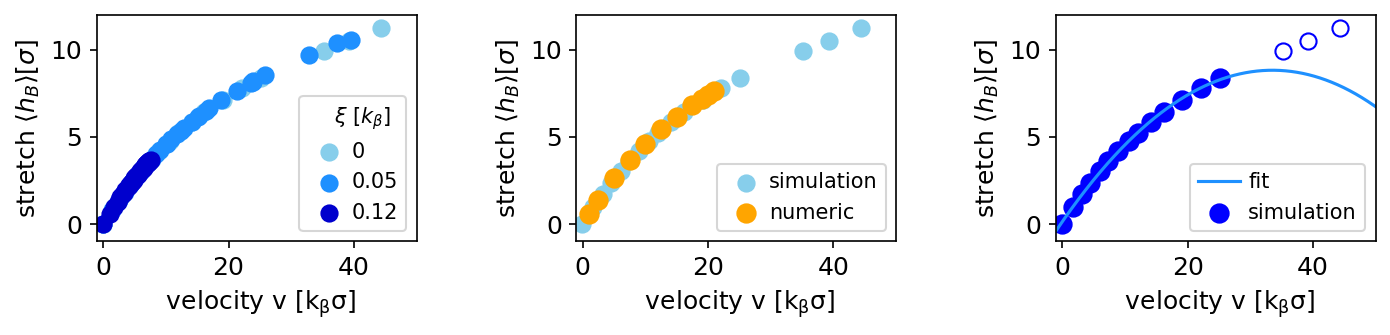

In [76]:
fig, axs = plt.subplots(1, 3, figsize = (11,2), dpi = 150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=.4)

#xiplot = [0, '025', '05', '085', '095', '12']
xiplot = [0, '05', '12']


axs[0].scatter(dictsimualtion.get(f'v0'), 
                dictsimualtion.get(f'h0'), 
                color = colors_blue[0], 
                s = 60, label = f'0')
axs[0].scatter(dictsimualtion.get(f'v05'), 
                dictsimualtion.get(f'h05'), 
                color = colors_blue[2], 
                s = 60, label = f'0.05')
axs[0].scatter(dictsimualtion.get(f'v12'), 
                dictsimualtion.get(f'h12'), 
                color = colors_blue[5], 
                s = 60, label = f'0.12')

axs[0].legend(loc = 'lower right', title = r'$\quad \xi\,\, [k_{\beta}]$', handletextpad = 0.1)


xiplot  = ['025']
axs[1].scatter(dictsimualtion.get(f'v0'), 
            dictsimualtion.get(f'h0'), 
            color = colors_blue[0], 
            s = 60, label = f'simulation')

for xi in xiplot:
    v = dictmathematica.get(f'v_stretch{xi}')
    Nb = dictmathematica.get(f'Nb_stretch{xi}')
    Nbu = dictmathematica.get(f'Nbu_stretch{xi}')
    h = [((dictmathematica.get(f'stretch{xi}')[i][1] - 10)*Nbu[i]  + (dictmathematica.get(f'stretch{xi}')[i][0])*Nb[i])/(Nbu[i] + Nb[i]) for i in range(0, len(v))]
    
    axs[1].scatter(v, h, color = 'orange', lw = 2, s = 60, label = 'numeric')

axs[1].legend(loc = 'lower right', handletextpad = 0.1)


v = dictsimualtion.get(f'v0')[0:-3]
h_bu = dictsimualtion.get(f'h0')[0:-3]

axs[2].scatter(v, h_bu, color = 'blue', lw = 2, s = 60, label = r'simulation')
axs[2].scatter(dictsimualtion.get(f'v0')[-3:],
            dictsimualtion.get(f'h0')[-3:], 
            ec = 'blue', fc = 'white', s = 60)
axs[2].plot(xnew, fitsquare(xnew, *popt_stretch_bu), color = 'dodgerblue', label = 'fit')
axs[2].legend(loc = 'lower right', handletextpad = 0.4)


for i in [0,1,2]:
    axs[i].set_ylim(-1, 12)
    axs[i].set_xlim(-1, 50)
    axs[i].set_yticks([0,5,10])
    axs[i].tick_params(labelsize=12)
    axs[i].set_xlabel(r' velocity v $\mathrm{[k_{\beta}\sigma]}$', fontsize = 12)
    axs[i].set_ylabel(r'stretch $\langle h_B \rangle [\sigma] $', fontsize = 12)


plt.show()

## Relation between F&v

In [104]:
# relation between F and v is obtained by using Hooke's law F = kappa*h*NB, where we insert the fit function for h and for NB

def Ffuncofv(v, xi):
    p = popt_p[0]*(xi- popt_p[1])
    NB = 8e04/((v-21)**2+p)
    kappab = 0.25
    hB = popt_stretch_bu[0]*(v-popt_stretch_bu[1])**2 + popt_stretch_bu[2]
    return kappab*NB*hB

fmaxfit = []
for i in range(0, 94):
    xi = i/1000
    fmaxfit.append(FatmaxNB(xi))

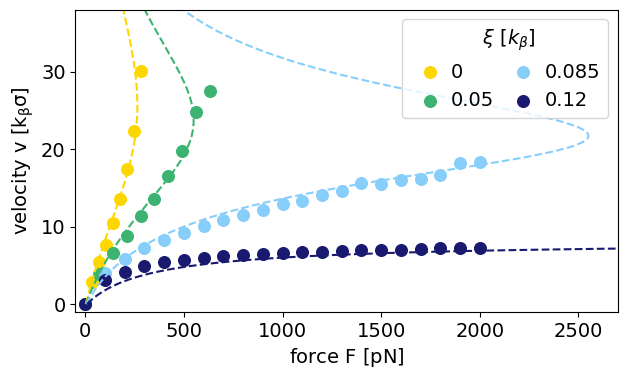

In [105]:
# Comparison for fit function and simulation results

fig = plt.figure(figsize = (7,4), dpi = 100)
xiplot = [0, 0.05, 0.085, 0.095, 0.12]

vnew = np.linspace(0, 40, 1000)
vnew12 = np.linspace(0, 7.5, 1000)
vnew95 = np.linspace(0, 17, 1000)

plt.plot(Ffuncofv(vnew, 0),vnew, '--', color = colorfinal[0], lw = 1.5)
plt.plot(Ffuncofv(vnew, 0.05), vnew,  '--', color = colorfinal[2], lw = 1.5)
plt.plot(Ffuncofv(vnew, 0.085),vnew,  '--', color = colorfinal[3], lw = 1.5)
plt.plot(Ffuncofv(vnew12, 0.12), vnew12,  '--', color = colorfinal[5], lw = 1.5)

    
plt.scatter(dictsimualtion_new.get(f'f0_s')[:-2], dictsimualtion_new.get(f'v0_s')[:-2],  color = colorfinal[0], s= 70, label = '0')
plt.scatter(dictsimualtion_new.get(f'f05')[:-1], dictsimualtion_new.get(f'v05')[:-1], color = colorfinal[2], s= 70, label = '0.05')
plt.scatter(dictsimualtion_new.get(f'f085'), dictsimualtion_new.get(f'v085'), color = colorfinal[3], s= 70, label = '0.085')
plt.scatter(dictsimualtion_new.get(f'f12'),  dictsimualtion_new.get(f'v12'), color = colorfinal[5], s= 70, label = '0.12')


plt.ylabel(r'velocity v $\mathrm{[k_{\beta}\sigma]}$', fontsize = 14)
plt.xlabel(r'force F $\mathrm{[pN]}$', fontsize = 14)
legend=plt.legend(loc = 'upper right',fontsize = 14, title = r' $ \xi\,\, [k_{\beta}]$', ncol = 2, handletextpad =0.1, columnspacing = 0.5)
legend.get_title().set_fontsize('14') 
plt.xlim(-50, 2700)
plt.ylim(-1, 38)

plt.yticks([0, 10,  20, 30], fontsize = 14)
plt.xticks([0, 500, 1000, 1500, 2000, 2500], fontsize = 14)

#plt.savefig(f'Plots/Thesis/v-vs-F.svg', format = 'svg', dpi = 150, bbox_inches = 'tight')
plt.show()

## Find force at v = 21 from simulations

In [106]:
def FatmaxNB(xi):
    v = 21
    p = popt_p[0]*(xi- popt_p[1])
    NB = 8e04/((v-21)**2+p)
    kappab = 0.25
    hB = popt_stretch_bu[0]*(v-popt_stretch_bu[1])**2 + popt_stretch_bu[2]
    return kappab*NB*hB

### Plot F against v and make a polyfit to evaluate F(21)

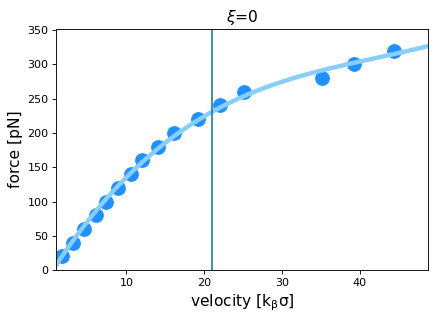

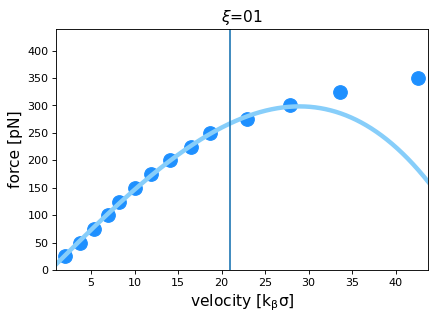

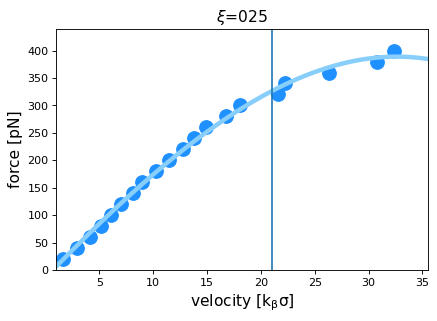

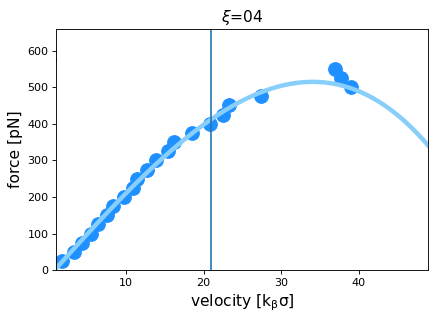

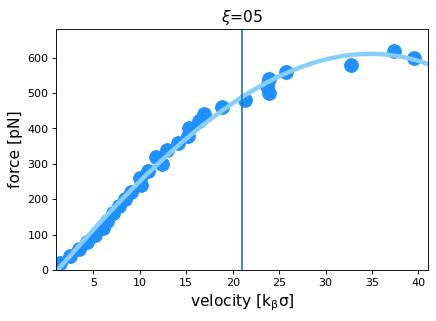

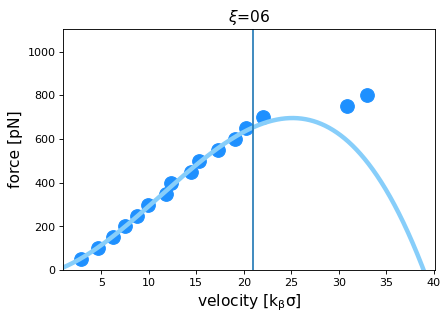

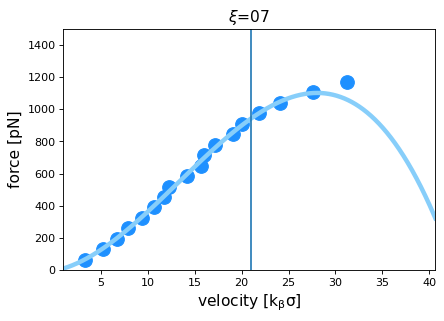

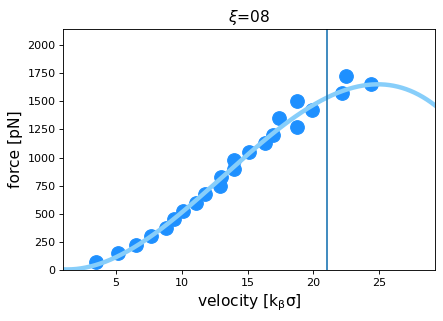

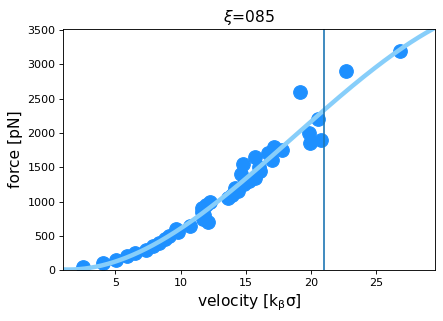

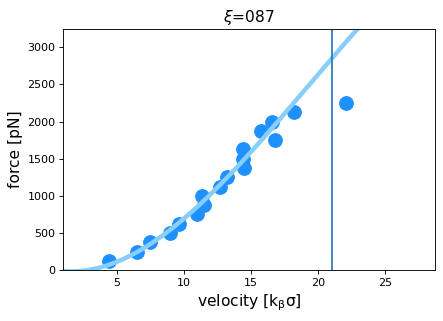

In [118]:
vmax = 21
fmaxpoly = []
xiplot = [0, '01', '025', '04',  '05',  '06', '07', '08', '085', '087']

t = np.linspace(0, 100, 10000)
for xi in xiplot:
    v = dictsimualtion.get(f'v{xi}')
    n = bisect.bisect_left(v, vmax)
    fig = plt.figure(figsize = (6,4), dpi = 80)
    
    plt.scatter( dictsimualtion.get(f'v{xi}'), dictsimualtion.get(f'f{xi}'), color = 'dodgerblue', s = 150)
    if xi == '04' or xi == '01' or xi == '08' or xi == '07':
        p = np.poly1d(np.polyfit(dictsimualtion.get(f'v{xi}')[0:-4],dictsimualtion.get(f'f{xi}')[0:-4],  3))
    elif xi == '06' or xi == '087':
        p = np.poly1d(np.polyfit(dictsimualtion.get(f'v{xi}')[0:-11],dictsimualtion.get(f'f{xi}')[0:-11],  3))
    else:
        p = np.poly1d(np.polyfit( dictsimualtion.get(f'v{xi}'), dictsimualtion.get(f'f{xi}'), 3))
    plt.plot(t, p(t), lw = 4, color = 'lightskyblue')
    fmaxpoly.append(p(21))
    plt.axvline(21)
    
    if xi == '04' or xi == '01' or xi == '08' or xi == '07':
        plt.xlim(1, 1.3*dictsimualtion.get(f'v{xi}')[-4])
        plt.ylim(0, 1.1*dictsimualtion.get(f'f{xi}')[-1])
    elif xi == '06' or xi == '087':
        plt.xlim(1, 1.3*dictsimualtion.get(f'v{xi}')[-10])
        plt.ylim(0, 1.3*dictsimualtion.get(f'f{xi}')[-8])
    else:
        plt.xlim(1, 1.1*dictsimualtion.get(f'v{xi}')[-1])
        plt.ylim(0, 1.1*dictsimualtion.get(f'f{xi}')[-1])
    plt.xlabel(r'velocity $\mathrm{[k_{\beta}\sigma]}$', fontsize = 14)
    plt.ylabel('force [pN]', fontsize = 14)
    plt.title(r'$\xi$'+f'={xi}', fontsize = 14)
    plt.show()

## Compare line of rupture with simulation results

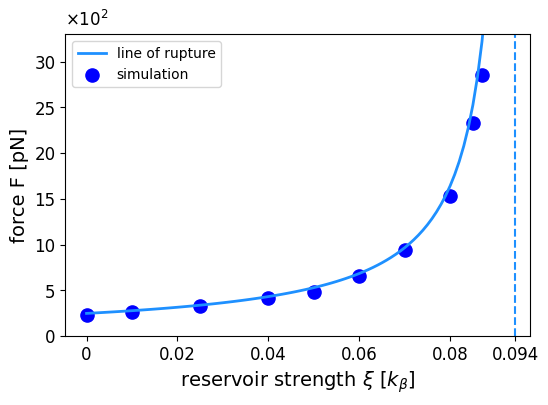

In [108]:
fig = plt.figure(figsize = (6,4), dpi = 100)

plt.plot([i/1000 for i in range(0, 94)], fmaxfit, color = 'dodgerblue', lw = 2, label = 'line of rupture')
#plt.scatter([0, 0.025, 0.05, 0.07, 0.08, 0.085],fmaxsim, s = 80, fc = 'white', ec = 'navy', label = r'F($N_{B,max}$) from simulation' )
plt.scatter([0, 0.01, 0.025, 0.04, 0.05, 0.06, 0.07, 0.08, 0.085, 0.087],fmaxpoly, s = 90, color = 'blue', label = r'simulation' )
plt.axvline(popt_p[1], ls = '--', color = 'dodgerblue')

plt.xlabel(r'reservoir strength $\xi\,\, [k_{\beta}]$', fontsize = 14)
plt.ylabel(r'force F [pN]', fontsize = 14)
plt.ylim(0, 3300)
plt.legend()
plt.xticks([0,0.02, 0.04, 0.06, 0.08, popt_p[1]], labels = [0,0.02, 0.04, 0.06, 0.08, 0.094], fontsize = 12)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000], labels = [0, 5, 10, 15, 20, 25, 30], fontsize = 12)
plt.title(r'$\times 10^2$', loc = 'left')

#plt.title(r'$\Delta = 10\,nm \quad \epsilon_b = 1.5 \quad \epsilon_f = 0.5$')
#plt.savefig(f'Plots/Thesis/LineOfRupture.svg', format = 'svg', dpi = 120, bbox_inches = 'tight')

plt.show()

# State Plot

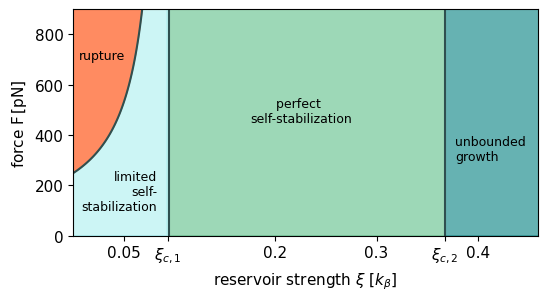

In [111]:
gp = 10
gm = 1
extraticks = [0.05, 0.094, 0.2, 0.3, np.exp(-1), 0.4]
ticklabel  = ['0.05', r'$\xi_{c,1}$',  '0.2', '0.3', r'$\xi_{c,2}$', '0.4']

fig = plt.figure(figsize =(6,3), dpi = 100)

plt.plot([i/1000 for i in range(0, 94)], fmaxfit, color = 'darkslategrey', lw = 1.5)

plt.axvline(0.0943,  color = 'darkslategrey', lw = 1.5)
plt.axvline(np.exp(.5-1.5), color = 'darkslategrey', lw = 1.5)

plt.text(0.006, 700, 'rupture',  fontsize = 9)
plt.text(0.083, 100, 'limited\nself-\nstabilization', fontsize = 9, ha = 'right')
plt.text(0.225, 450, 'perfect \nself-stabilization', fontsize = 9, ha = 'center')
plt.text(0.378, 300, 'unbounded \ngrowth', fontsize = 9)


plt.xticks(extraticks, labels = ticklabel, fontsize = 11 )

plt.yticks([0, 200, 400, 600, 800], fontsize = 11)


plt.ylim(0, 900)
plt.xlim(0, 0.46)
plt.xlabel(r'reservoir strength $\xi\,\, [k_{\beta}]$', fontsize = 11) 
plt.ylabel(r'force F$\,\mathrm{[pN]}$', fontsize = 11)

plt.fill_betweenx(y = np.arange(0,2600,1/10), x1 = 0.0943, x2 = np.exp(-1), color = 'mediumseagreen', alpha = 0.5)
plt.fill_betweenx(y = np.arange(0,2600,1/10), x1 = np.exp(-1), x2 = 1, color = 'teal', alpha = 0.6)

plt.fill_between(x =[i/1000 for i in range(0, 94)], y1 = fmaxfit,  color = 'darkturquoise', alpha = 0.2)
plt.fill_between(x =[i/1000 for i in range(0, 94)], y1 = fmaxfit, y2 = 900,  color = 'coral', alpha = 0.9)


plt.show()